## Source Dataset

I found a decent tennis dataset with matches and player data for both the ATP and WTA, covering the years from 1950 to 2021
https://www.kaggle.com/datasets/taylorbrownlow/atpwta-tennis-data?resource=download&select=KaggleMatches.csv

This notebook contains some analytics at match and tournament level. I've created functions for the analysis below and applied it to some examples. Feel free to apply it to your own players or tournaments!

#### Contents:
* [Dataset Exploration](#1-bullet)
* [Find tournament winner for a given year](#2-bullet)
    * [Who won the Barcelona Open in 2010?](#21-bullet)
* [Find titles won by a player](#3-bullet)
    * [Which titles has Fernando Verdasco won?](#31-bullet)
* [Let's analyse some famous head-to-heads!](#4-bullet)
    * [Federer v/s Nadal](#5-bullet)
    * [Nadal v/s Djokovic](#6-bullet)
    * [Sampras v/s Agassi](#7-bullet)
* [Let's track player's rank through the years!](#8-bullet)
    * [The big 3!](#81-bullet)
    * [The 90s superstars!](#82-bullet)
* [Which major tournaments are the most and least upset prone?](#9-bullet)
    * [Grand Slams](#91-bullet)
    * [Master's 1000's](#92-bullet)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.15)

In [2]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [4]:
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px

## Dataset Exploration <a class="anchor" id="1-bullet"></a>

In [5]:
# Matches database
df_matches = pd.read_csv(r'C:\Users\slaye\Desktop\Python\Tennis\KaggleMatches.csv')
df_matches.head(5)

C:\Users\slaye\AppData\Local\Temp\ipykernel_28916\3804434625.py:2: DtypeWarning:

Columns (3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.



,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,league
0,2019-M020,Brisbane,Hard,32,A,2018-12-31,300,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.004791,106421,4.0,NaN,Daniil Medvedev,R,NaN,RUS,22.885695,6-4 3-6 6-2,3,F,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,8.0,6.0,100.0,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,atp
1,2019-M020,Brisbane,Hard,32,A,2018-12-31,299,106421,4.0,NaN,Daniil Medvedev,R,NaN,RUS,22.885695,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,7-6(6) 6-2,3,SF,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,17.0,2.0,77.0,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,atp
2,2019-M020,Brisbane,Hard,32,A,2018-12-31,298,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.004791,104871,NaN,NaN,Jeremy Chardy,R,188.0,FRA,31.882272,6-2 6-2,3,SF,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,10.0,3.0,46.0,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,atp
3,2019-M020,Brisbane,Hard,32,A,2018-12-31,297,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,200282,7.0,NaN,Alex De Minaur,R,NaN,AUS,19.868583,6-4 7-6(2),3,QF,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,1.0,2.0,81.0,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,atp
4,2019-M020,Brisbane,Hard,32,A,2018-12-31,296,106421,4.0,NaN,Daniil Medvedev,R,NaN,RUS,22.885695,105683,5.0,NaN,Milos Raonic,R,196.0,CAN,28.010951,6-7(2) 6-3 6-4,3,QF,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,29.0,5.0,94.0,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,atp


In [6]:
# Create columns for day, month, year of match
df_matches['tourney_date'] = pd.to_datetime(df_matches['tourney_date'])

df_matches['year'] = df_matches['tourney_date'].dt.year
df_matches['month'] = df_matches['tourney_date'].dt.month
df_matches['day'] = df_matches['tourney_date'].dt.day

In [7]:
# Extents of matches
print(f'First match in dataset: {df_matches["tourney_date"].min()}')
print(f'Last match in dataset: {df_matches["tourney_date"].max()}')

First match in dataset: 1949-12-22 00:00:00
Last match in dataset: 2021-02-22 00:00:00


In [8]:
# Players dataset
df_players = pd.read_csv(r'C:\Users\slaye\Desktop\Python\Tennis\KagglePlayers.csv')
df_players.head(5)

,player_id,name_first,name_last,hand,birthdate,country,gender
0,100001,Gardnar,Mulloy,R,19131122.0,USA,male
1,100002,Pancho,Segura,R,19210620.0,ECU,male
2,100003,Frank,Sedgman,R,19271002.0,AUS,male
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,male
4,100005,Richard Pancho,Gonzales,R,19280509.0,USA,male


In [9]:
# The birthdate column is not well formatted
df_players_cleaned = df_players[~pd.isnull(df_players['birthdate'])]
df_players_cleaned.loc[:, 'birth_year'] = df_players_cleaned['birthdate'].apply(lambda x:int(str(x)[0:4]))

print('Oldest Players in dataset:')
display(df_players_cleaned[df_players_cleaned['birth_year']==df_players_cleaned['birth_year'].min()])

print('Youngest Players in dataset:')
display(df_players_cleaned[df_players_cleaned['birth_year']==df_players_cleaned['birth_year'].max()])

# create a column for league
df_players_cleaned.loc[:, 'league'] = df_players_cleaned['gender'].apply(lambda x:'atp' if x=='male' else 'wta')

Oldest Players in dataset:


,player_id,name_first,name_last,hand,birthdate,country,gender,birth_year
14626,114642,John Henry,Lewis,NaN,18340000.0,GBR,male,1834


Youngest Players in dataset:


,player_id,name_first,name_last,hand,birthdate,country,gender,birth_year
54553,209519,Ivan,Savkin,U,20050210.0,USA,male,2005
76992,221996,Isabella,Kruger,R,20050330.0,RSA,female,2005
77254,222258,Linda,Fruhvirtova,R,20050501.0,CZE,female,2005
77874,222878,Melisa,Ercan,U,20050901.0,TUR,female,2005
77976,222980,Lucie,Havlickova,R,20050313.0,CZE,female,2005
78116,223120,Briana,Szabo,U,20051126.0,ROU,female,2005
78125,223129,Michaela,Laki,U,20050324.0,GRE,female,2005
78132,223136,Rozhan,Karajayeva,U,20051009.0,TKM,female,2005
78249,223253,Alexandra,Eala,U,20050523.0,PHL,female,2005
78282,223286,Victoria,Jimenez Kasintseva,U,20050809.0,AND,female,2005


## Find tournament winner for a given year <a class="anchor" id="2-bullet"></a>

#### Who won the Barcelona Open in 2010? <a class="anchor" id="21-bullet"></a>

In [17]:
def find_tourney_winner(df_input, year, tourney_name_str, league='atp'):
    """ Find winner for a given year and tournament"""
    
    year_filter = (df_input['year'] == year)
    league_filter = (df_input['league'] == league)
    
    df = df_input[year_filter & league_filter]
    tournaments_matched = [t for t in df['tourney_name'].unique() if tourney_name_str.lower() in t.lower()]
    
    print(f'{len(tournaments_matched)} matching tourney(s) found in {year}: {tournaments_matched}')
    for tourney in tournaments_matched:
        name_filter = (df['tourney_name'] == tourney)
        df_filt = df[name_filter]
        df_finals = df_filt[df_filt['round'] == 'F']
        winner = df_finals['winner_name'].to_list()[0]
        print(f'{year} {tourney} winner: {winner}')

In [18]:
find_tourney_winner(df_matches, 2010, 'barc')

1 matching tourney(s) found in 2010: ['Barcelona']
2010 Barcelona winner: Fernando Verdasco


## Find titles and finals won by a player <a class="anchor" id="3-bullet"></a>

#### What silverware has Fernando Verdasco won? <a class="anchor" id="31-bullet"></a>
The Barcelona Open winner we saw earlier

In [21]:
def find_player_titles(df_input, player_name_input, league='atp'):
    """ Find ATP silverware (finals and titles) won by a player """
    
    finals_filt = (df_input['round'] == 'F')
    league_filter = (df_input['league'] == league)
    df = df_input[finals_filt & league_filter]
    
    players_matched_won = [w for w in df['winner_name'].unique() if player_name_input.lower() in w.lower()]
    players_matched_lost = [w for w in df['loser_name'].unique() if player_name_input.lower() in w.lower()]
    players_matched = set(players_matched_won + players_matched_lost)
    
    result_cols = ['year', 'month', 'day', 'tourney_name', 'draw_size', 
                   'tourney_level', 'surface']
    
    if len(players_matched) == 0:
        print('No matching players found who have won or lost tourney finals')
    else:
        print(f'{len(players_matched)} matching player(s) found: {players_matched}')
        for player in players_matched:
            print(f'Player {player}')
            df_player_win = df[(df['winner_name'] == player)][result_cols + ['winner_seed']]
            df_player_win.rename(columns={'winner_seed': 'seed'}, inplace=True)
            df_player_win['result'] = 'Winner'
            
            df_player_finals = df[(df['loser_name'] == player)][result_cols + ['loser_seed']]
            df_player_finals['result'] = 'Finalist'
            df_player_finals.rename(columns={'loser_seed': 'seed'}, inplace=True)
            
            df_player = pd.concat([df_player_win, df_player_finals])
            
            with pd.option_context('display.max_rows', None):
                display(df_player.sort_values(by=['year', 'month', 'day']))

In [22]:
find_player_titles(df_matches, 'verdasco')

1 matching player(s) found: {'Fernando Verdasco'}
Player Fernando Verdasco


,year,month,day,tourney_name,draw_size,tourney_level,surface,seed,result
134003,2004,3,1,Acapulco,32,A,Clay,NaN,Finalist
133689,2004,4,12,Valencia,32,A,Clay,NaN,Winner
134856,2005,7,25,Kitzbuhel,48,A,Clay,NaN,Finalist
143185,2007,10,22,St. Petersburg,32,A,Carpet,6.0,Finalist
9731,2008,6,16,Nottingham,32,A,Grass,3.0,Finalist
8720,2008,7,14,Umag,28,A,Clay,1.0,Winner
10829,2009,1,4,Brisbane,32,A,Hard,3.0,Finalist
10740,2009,8,23,New Haven,48,A,Hard,2.0,Winner
12784,2009,9,28,Kuala Lumpur,28,A,Hard,2.0,Finalist
128601,2010,2,8,San Jose,32,A,Hard,2.0,Winner


**As can be seen, it's been a few years since Verdasco has won some silverware. But he's fighting on the tour, blasting forehands whenever he can!**

## Let's analyse some famous head-to-heads! <a class="anchor" id="4-bullet"></a>

In [31]:
def player_h2h(df_input, player1, player2, league='atp', disp_results=True):
    """ Find head to head matches between player1 and player2 """
    
    league_filter = (df_input['league'] == league)
    df = df_input[league_filter]
    
    players = set(df['winner_name'].to_list() + df['loser_name'].to_list())
    player1_matched = [p for p in players if player1.lower() in p.lower()]
    if len(player1_matched) > 1:
        print(f'WARNING: multiple matched players found for {player1}: {player1_matched}')
        print(f'Considering only {player1_matched[0]}')
    p1 = player1_matched[0]
        
    player2_matched = [p for p in players if player2.lower() in p.lower()]
    if len(player2_matched) > 1:
        print(f'WARNING: multiple matched players found for {player2}: {player2_matched}')
        print(f'Considering only {player2_matched[0]}')
    p2 = player2_matched[0]
    
    result_cols = ['year', 'month', 'day', 'tourney_name', 'round', 'surface', 'score', 
                   'minutes', 'draw_size', 'tourney_level', 'winner_name', 'tourney_date']
    
    p1_w_p2_l = df[(df['winner_name']==p1) & (df['loser_name']==p2)][result_cols]
    p1_l_p2_w = df[(df['winner_name']==p2) & (df['loser_name']==p1)][result_cols]
    p1_w_p2_l.sort_values(by=['tourney_date'], inplace=True)
    p1_l_p2_w.sort_values(by=['tourney_date'], inplace=True)
    p1_w_p2_l.loc[:, 'win_no'] = np.linspace(1, len(p1_w_p2_l), num=len(p1_w_p2_l), endpoint=True)
    p1_l_p2_w.loc[:, 'win_no'] = np.linspace(1, len(p1_l_p2_w), num=len(p1_l_p2_w), endpoint=True)
    
    print(f'{p1}: {p2} H2H = {len(p1_w_p2_l)}:{len(p1_l_p2_w)}')

    if disp_results:
        print(f'{p1} defeats {p2} in {len(p1_w_p2_l)} matches')
        with pd.option_context('display.max_rows', None):
                display(p1_w_p2_l)
                
        print(f'{p2} defeats {p1} in {len(p1_l_p2_w)} matches')
        with pd.option_context('display.max_rows', None):
                display(p1_l_p2_w)
                
    combined = pd.concat([p1_w_p2_l, p1_l_p2_w])
    return combined.sort_values(by=['tourney_date'])


def plot_h2h_over_time(h2h):
    """ Plot the h2h over time and surface, uses the output of the 'player_h2h' function """
    
    players = h2h['winner_name'].unique()
    p1, p2 = players[0], players[1]
    p1_sn, p2_sn = p1.split(' ')[1], p2.split(' ')[1]
    surfaces = h2h['surface'].unique()
    
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(data=h2h, x='tourney_date', y='win_no', hue='winner_name', ax=ax, marker='o')
    ax.set_xlabel('Match date')
    ax.set_ylabel('Win #')
    ax.set_title(f'Overall H2H {p1}:{p2}')
    ax.legend(fontsize='medium')
    
    fig, axs = plt.subplots(nrows=1, ncols=len(surfaces), figsize=(15,4))
    for surface, ax in zip(surfaces, axs):
        h2h_surf = h2h[h2h['surface']==surface]
        
        h2h_surf_p1 = h2h_surf[h2h_surf['winner_name']==p1]
        h2h_surf_p1.loc[:, 'win_no_surf'] = np.linspace(1, len(h2h_surf_p1), num=len(h2h_surf_p1), endpoint=True)
        
        h2h_surf_p2 = h2h_surf[h2h_surf['winner_name']==p2]
        h2h_surf_p2.loc[:, 'win_no_surf'] = np.linspace(1, len(h2h_surf_p2), num=len(h2h_surf_p2), endpoint=True)
        combined = pd.concat([h2h_surf_p1, h2h_surf_p2])
        
        sns.lineplot(data=combined, x='tourney_date', y='win_no_surf', hue='winner_name', ax=ax, marker='o')
        ax.set_xlabel('Match date')
        ax.set_ylabel('Win #')
        ax.set_title(f'H2H {p1_sn}:{p2_sn}\nOn {surface}')
        ax.tick_params(axis='x', labelrotation=45)
        ax.legend(fontsize='small')
    fig.tight_layout()

## Federer v/s Nadal <a class="anchor" id="5-bullet"></a>
The classic fire and ice h2h for the ages!

In [32]:
h2h = player_h2h(df_matches, 'federer', 'nadal')

Roger Federer: Rafael Nadal H2H = 17:24
Roger Federer defeats Rafael Nadal in 17 matches


,year,month,day,tourney_name,round,surface,score,minutes,draw_size,tourney_level,winner_name,tourney_date,win_no
135418,2005,3,21,Miami Masters,F,Hard,2-6 6-7(4) 7-6(5) 6-3 6-1,223.0,96,M,Roger Federer,2005-03-21,1.0
152275,2006,6,26,Wimbledon,F,Grass,6-0 7-6(5) 6-7(2) 6-3,178.0,128,G,Roger Federer,2006-06-26,2.0
152595,2006,11,13,Masters Cup,SF,Hard,6-4 7-5,113.0,8,F,Roger Federer,2006-11-13,3.0
141955,2007,5,14,Hamburg Masters,F,Clay,2-6 6-2 6-0,115.0,56,M,Roger Federer,2007-05-14,4.0
143027,2007,6,25,Wimbledon,F,Grass,7-6(7) 4-6 7-6(3) 2-6 6-2,225.0,128,G,Roger Federer,2007-06-25,5.0
143347,2007,11,12,Masters Cup,SF,Hard,6-4 6-1,59.0,8,F,Roger Federer,2007-11-12,6.0
10309,2009,5,10,Madrid Masters,F,Clay,6-4 6-4,86.0,56,M,Roger Federer,2009-05-10,7.0
131154,2010,11,21,Tour Finals,F,Hard,6-3 3-6 6-1,98.0,8,F,Roger Federer,2010-11-21,8.0
140721,2011,11,20,Tour Finals,RR,Hard,6-3 6-0,61.0,16,F,Roger Federer,2011-11-20,9.0
147715,2012,3,8,Indian Wells Masters,SF,Hard,6-3 6-4,92.0,96,M,Roger Federer,2012-03-08,10.0


Rafael Nadal defeats Roger Federer in 24 matches


,year,month,day,tourney_name,round,surface,score,minutes,draw_size,tourney_level,winner_name,tourney_date,win_no
132053,2004,3,22,Miami Masters,R32,Hard,6-3 6-3,70.0,96,M,Rafael Nadal,2004-03-22,1.0
136660,2005,5,23,Roland Garros,SF,Clay,6-3 4-6 6-4 6-3,167.0,128,G,Rafael Nadal,2005-05-23,2.0
151835,2006,2,27,Dubai,F,Hard,2-6 6-4 6-4,113.0,32,A,Rafael Nadal,2006-02-27,3.0
151093,2006,4,17,Monte Carlo Masters,F,Clay,6-2 6-7(2) 6-3 7-6(5),230.0,64,M,Rafael Nadal,2006-04-17,4.0
151219,2006,5,8,Rome Masters,F,Clay,6-7(0) 7-6(5) 6-4 2-6 7-6(5),305.0,64,M,Rafael Nadal,2006-05-08,5.0
152117,2006,5,29,Roland Garros,F,Clay,1-6 6-1 6-4 7-6(4),182.0,128,G,Rafael Nadal,2006-05-29,6.0
141900,2007,4,15,Monte Carlo Masters,F,Clay,6-4 6-4,95.0,56,M,Rafael Nadal,2007-04-15,7.0
142869,2007,5,28,Roland Garros,F,Clay,6-3 4-6 6-3 6-4,190.0,128,G,Rafael Nadal,2007-05-28,8.0
8215,2008,4,20,Monte Carlo Masters,F,Clay,7-5 7-5,103.0,56,M,Rafael Nadal,2008-04-20,9.0
8270,2008,5,11,Hamburg Masters,F,Clay,7-5 6-7(3) 6-3,172.0,56,M,Rafael Nadal,2008-05-11,10.0


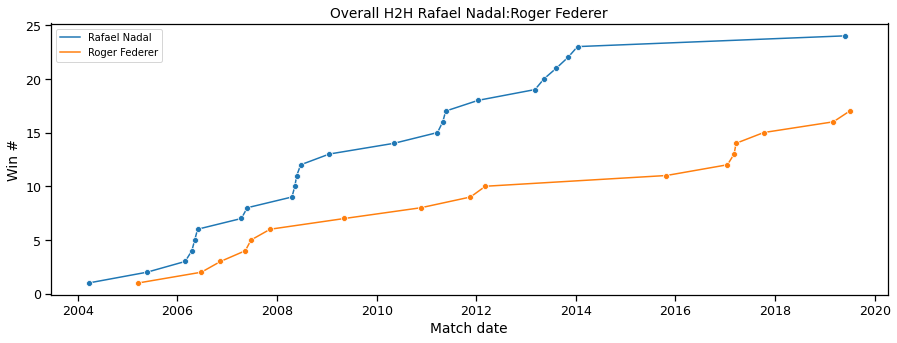

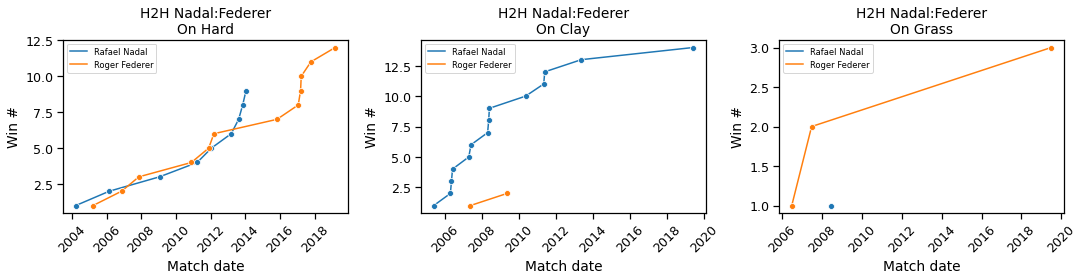

In [33]:
plot_h2h_over_time(h2h)

**The H2H is massively skewed by the highly disproportionate wins on Clay by Nadal. But since 2014, Federer clearly had the upper hand in their matches**

## Djokovic v/s Nadal <a class="anchor" id="6-bullet"></a>
The hottest baseline rivalry ever!

In [34]:
h2h = player_h2h(df_matches, 'novak djokovic', 'nadal')

Novak Djokovic: Rafael Nadal H2H = 29:27
Novak Djokovic defeats Rafael Nadal in 29 matches


,year,month,day,tourney_name,round,surface,score,minutes,draw_size,tourney_level,winner_name,tourney_date,win_no
141716,2007,3,19,Miami Masters,QF,Hard,6-3 6-4,97.0,96,M,Novak Djokovic,2007-03-19,1.0
142142,2007,8,5,Canada Masters,SF,Hard,7-5 6-3,111.0,56,M,Novak Djokovic,2007-08-05,2.0
8128,2008,3,13,Indian Wells Masters,SF,Hard,6-3 6-2,88.0,96,M,Novak Djokovic,2008-03-13,3.0
8496,2008,7,28,Cincinnati Masters,SF,Hard,6-1 7-5,86.0,56,M,Novak Djokovic,2008-07-28,4.0
11561,2009,8,16,Cincinnati Masters,SF,Hard,6-1 6-4,92.0,56,M,Novak Djokovic,2009-08-16,5.0
10902,2009,11,8,Paris Masters,SF,Hard,6-2 6-3,77.0,48,M,Novak Djokovic,2009-11-08,6.0
12798,2009,11,22,Tour Finals,RR,Hard,7-6(5) 6-3,118.0,8,F,Novak Djokovic,2009-11-22,7.0
138582,2011,3,10,Indian Wells Masters,F,Hard,4-6 6-3 6-2,146.0,96,M,Novak Djokovic,2011-03-10,8.0
138677,2011,3,23,Miami Masters,F,Hard,4-6 6-3 7-6(4),202.0,96,M,Novak Djokovic,2011-03-23,9.0
138981,2011,5,1,Madrid Masters,F,Clay,7-5 6-4,138.0,56,M,Novak Djokovic,2011-05-01,10.0


Rafael Nadal defeats Novak Djokovic in 27 matches


,year,month,day,tourney_name,round,surface,score,minutes,draw_size,tourney_level,winner_name,tourney_date,win_no
152114,2006,5,29,Roland Garros,QF,Clay,6-4 6-4 RET,114.0,128,G,Rafael Nadal,2006-05-29,1.0
141814,2007,3,5,Indian Wells Masters,F,Hard,6-2 7-5,94.0,96,M,Rafael Nadal,2007-03-05,2.0
142007,2007,5,7,Rome Masters,QF,Clay,6-2 6-3,101.0,56,M,Rafael Nadal,2007-05-07,3.0
142868,2007,5,28,Roland Garros,SF,Clay,7-5 6-4 6-2,148.0,128,G,Rafael Nadal,2007-05-28,4.0
143026,2007,6,25,Wimbledon,SF,Grass,3-6 6-1 4-1 RET,101.0,128,G,Rafael Nadal,2007-06-25,5.0
143346,2007,11,12,Masters Cup,RR,Hard,6-4 6-4,104.0,8,F,Rafael Nadal,2007-11-12,6.0
8269,2008,5,11,Hamburg Masters,SF,Clay,7-5 2-6 6-2,183.0,56,M,Rafael Nadal,2008-05-11,7.0
9156,2008,5,25,Roland Garros,SF,Clay,6-4 6-2 7-6(3),169.0,128,G,Rafael Nadal,2008-05-25,8.0
7384,2008,6,9,Queen's Club,F,Grass,7-6(6) 7-5,136.0,56,A,Rafael Nadal,2008-06-09,9.0
9913,2008,8,11,Beijing Olympics,SF,Hard,6-4 1-6 6-4,131.0,64,A,Rafael Nadal,2008-08-11,10.0


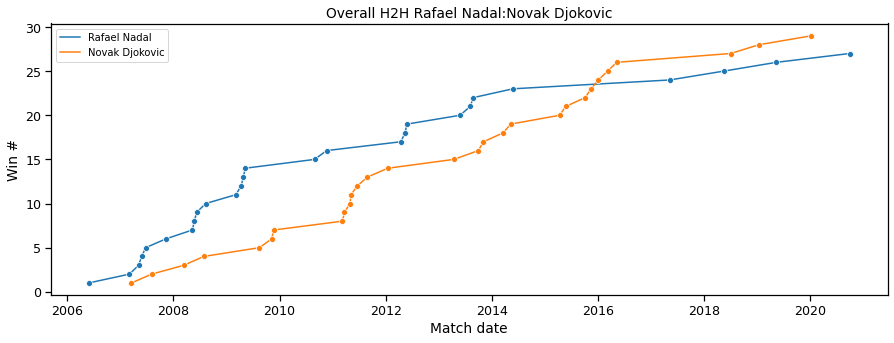

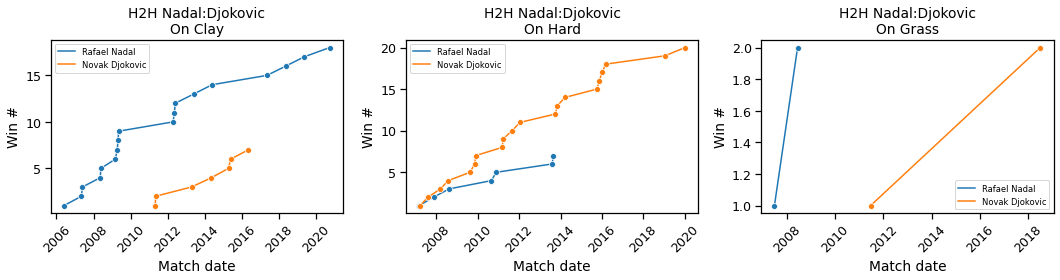

In [35]:
plot_h2h_over_time(h2h)

**A rivalry that has given us more highlight reel moments than any other matchup! They each have their surfaces where they dominate the other, but Djokovic leads their H2H very slightly**

## Sampras v/s Agassi <a class="anchor" id="7-bullet"></a>
The contrasting style battle of the 90s!

In [36]:
h2h = player_h2h(df_matches, 'sampras', 'agassi')

Pete Sampras: Andre Agassi H2H = 20:14
Pete Sampras defeats Andre Agassi in 20 matches


,year,month,day,tourney_name,round,surface,score,minutes,draw_size,tourney_level,winner_name,tourney_date,win_no
73817,1990,2,19,Philadelphia,R16,Carpet,5-7 7-5 RET,NaN,48,A,Pete Sampras,1990-02-19,1.0
76215,1990,8,27,US Open,F,Hard,6-4 6-3 6-2,NaN,128,G,Pete Sampras,1990-08-27,2.0
80643,1991,11,12,Tour Finals,RR,Carpet,6-3 1-6 6-3,97.0,8,F,Pete Sampras,1991-11-12,3.0
49936,1993,6,21,Wimbledon,QF,Grass,6-2 6-2 3-6 3-6 6-4,NaN,128,G,Pete Sampras,1993-06-21,4.0
22306,1994,3,7,Miami Masters,F,Hard,5-7 6-3 6-3,135.0,96,M,Pete Sampras,1994-03-07,5.0
22528,1994,3,28,Osaka,SF,Hard,6-3 6-1,55.0,32,A,Pete Sampras,1994-03-28,6.0
25353,1994,11,15,Tour Finals,SF,Carpet,4-6 7-6(5) 6-3,170.0,8,F,Pete Sampras,1994-11-15,7.0
18427,1995,3,6,Indian Wells Masters,F,Hard,7-5 6-3 7-5,133.0,56,M,Pete Sampras,1995-03-06,8.0
20633,1995,8,28,US Open,F,Hard,6-4 6-3 4-6 7-5,NaN,128,G,Pete Sampras,1995-08-28,9.0
29945,1996,2,12,San Jose,F,Hard,6-2 6-3,67.0,32,A,Pete Sampras,1996-02-12,10.0


Andre Agassi defeats Pete Sampras in 14 matches


,year,month,day,tourney_name,round,surface,score,minutes,draw_size,tourney_level,winner_name,tourney_date,win_no
97836,1989,5,15,Rome,R32,Clay,6-2 6-1,NaN,64,M,Andre Agassi,1989-05-15,1.0
76917,1990,11,12,Tour Finals,RR,Carpet,6-4 6-2,NaN,8,F,Andre Agassi,1990-11-12,2.0
67558,1992,4,27,Atlanta,F,Clay,7-5 6-4,73.0,32,A,Andre Agassi,1992-04-27,3.0
68008,1992,5,25,Roland Garros,QF,Clay,7-6(6) 6-2 6-1,120.0,128,G,Andre Agassi,1992-05-25,4.0
25243,1994,10,31,Paris Masters,QF,Carpet,7-6(6) 7-5,121.0,48,M,Andre Agassi,1994-10-31,5.0
17920,1995,1,16,Australian Open,F,Hard,4-6 6-1 7-6(6) 6-4,NaN,128,G,Andre Agassi,1995-01-16,6.0
18522,1995,3,13,Miami Masters,F,Hard,3-6 6-2 7-6(3),133.0,96,M,Andre Agassi,1995-03-13,7.0
20139,1995,7,24,Canada Masters,F,Hard,3-6 6-2 6-3,113.0,56,M,Andre Agassi,1995-07-24,8.0
124925,1998,2,9,San Jose,F,Hard,6-2 6-4,69.0,32,A,Andre Agassi,1998-02-09,9.0
127028,1998,8,3,Canada Masters,QF,Hard,6-7(5) 6-1 6-2,121.0,56,M,Andre Agassi,1998-08-03,10.0


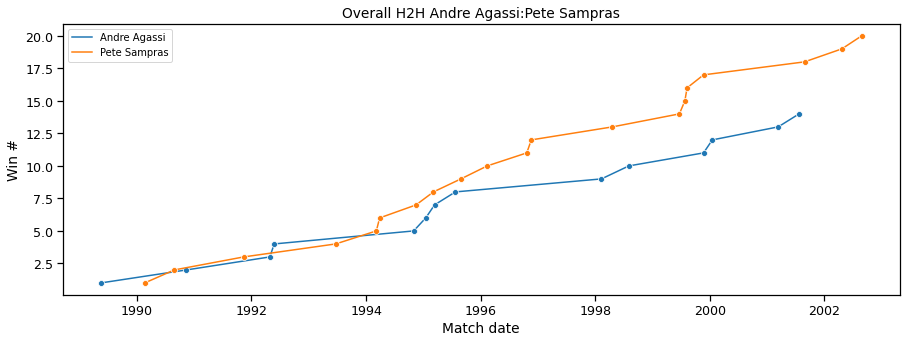

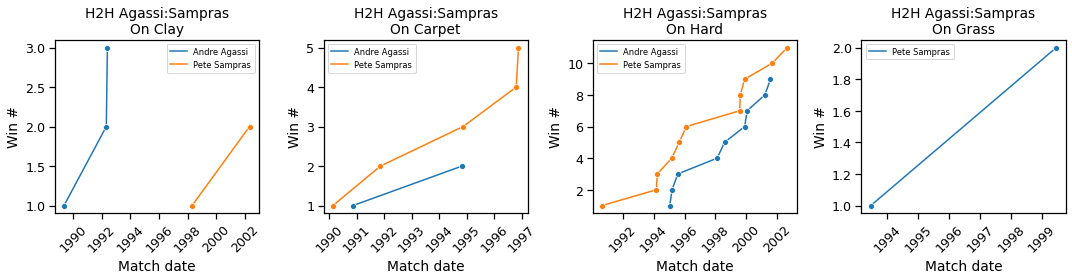

In [37]:
plot_h2h_over_time(h2h)

**Another classic rivalry, a matchup of two very contrasting styles. Sampras had the lead in this H2H for most of their careers and the gap only kept widening**

## Let's track player's rank through the years! <a class="anchor" id="8-bullet"></a>

In [74]:
def track_player_rank(df_input, players, league='atp', plot_ylim=100):
    """ Visually track one or more player's rank through their playing years """
    
    league_filter = (df_input['league'] == league)
    df = df_input[league_filter]
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Rank')
    ax.set_title('Player rank')
    ax.set_ylim([0, plot_ylim])
    
    all_players = set(df['winner_name'].to_list() + df['loser_name'].to_list())
    matched_players = []
    for player in players:
        player_matched = [p for p in all_players if player.lower() in p.lower()]
        if len(player_matched) == 0:
            print(f'WARNING: no matched players found for {player}')
            continue
        if len(player_matched) > 1:
            print(f'WARNING: multiple matched players found for {player}: {player_matched}')
            print(f'Considering only {player_matched[0]}')
        p = player_matched[0]
        matched_players.append(p)
            
    df_player_win = df[df['winner_name'].isin(matched_players)][['tourney_date', 'winner_rank', 'winner_name']]
    df_player_win.rename(columns={'winner_rank': 'rank', 'winner_name': 'name'}, inplace=True)
    df_player_loss = df[df['loser_name'].isin(matched_players)][['tourney_date', 'loser_rank', 'loser_name']]
    df_player_loss.rename(columns={'loser_rank': 'rank', 'loser_name': 'name'}, inplace=True)
    df_player = pd.concat([df_player_win, df_player_loss])
    df_player.sort_values(by=['tourney_date'], inplace=True, ignore_index=True)
    sns.lineplot(data=df_player, x='tourney_date', y='rank', hue='name', ax=ax)
    ax.legend(fontsize='medium')
    ax.set_ylabel('Rank')

### The big 3! <a class="anchor" id="81-bullet"></a>

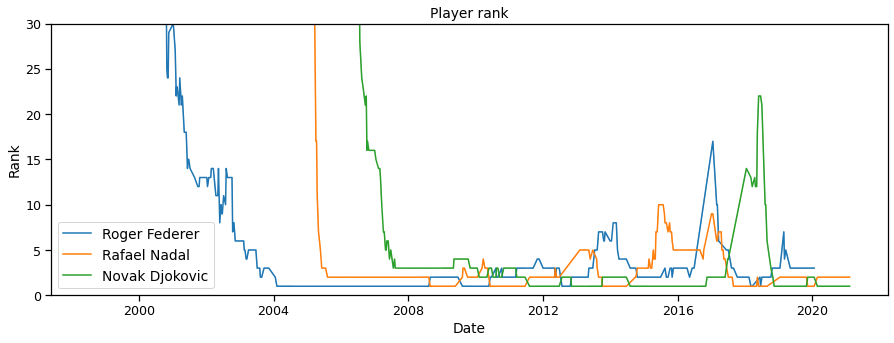

In [75]:
track_player_rank(df_matches, ['federer', 'nadal', 'novak djokovic'], plot_ylim=30)

**The big 3 clearly have had a chokehold on the top ranks in the sport since 2008, showcasing their utter dominance**

### The superstars of the 90s! <a class="anchor" id="82-bullet"></a>

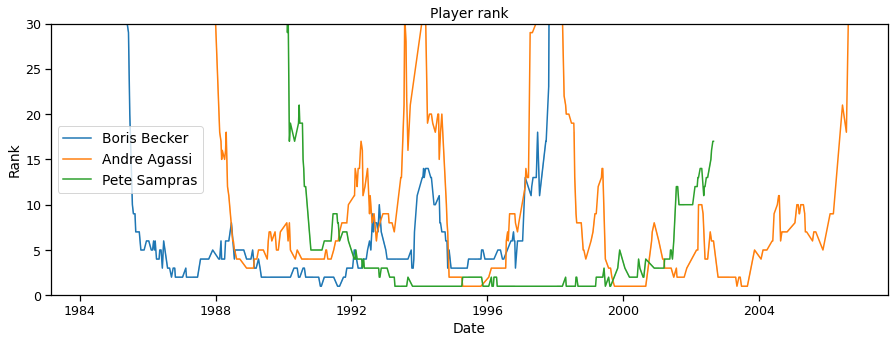

In [76]:
track_player_rank(df_matches, ['sampras', 'agassi', 'boris becker'], plot_ylim=30)

**Of the 3 tennis stars of the 90's, it seems Agassi was the most temperamental with wide swings in his ranking. Sampras was the most consistent and was #1 for most of the 90s**

## Which major tournaments are the most and least upset prone? <a class="anchor" id="9-bullet"></a>

Let's define an upset prone tournament as one in which more players outside the top seeds make it to a late stage such as the QF's. Conversely, a less upset prone one is one in which the top seeds make it to the late stage, as expected by the seeding. For ease, let's consider only the Grand Slams and the Master's 1000 tournaments

In [91]:
def convert_seed_to_int(seeds):
    """ Convert list of seed str's to int """
    
    seeds = set(seeds)
    seeds_conv = []
    
    for seed in seeds:
        try:
            seeds_conv.append(int(float(seed)))
        except:
            seeds_conv.append(0)
    return set(seeds_conv)


def tourney_upset_fraction(df_input, tourney_name, year_start=2000, year_end=2023, stage='QF', top_n=10):
    """ Calculate the 'upset fraction' of a tournament over a specified set of years (by default, since 2000).
    The upset fraction is defined as the fraction of players in the specified stage (can be 'QF', 'SF' or 'F', 
    by default the 'QF') who are outside the top-n seeds, where n is an input to the function (by default 10)"""
    
    tourney_filter = (df_input['tourney_name']==tourney_name)
    t_start = pd.to_datetime(f'{year_start}-01-01', format='%Y-%m-%d')
    t_end = pd.to_datetime(f'{year_end}-01-01', format='%Y-%m-%d')
    year_filter = (df_input['tourney_date'] > t_start) & (df_input['tourney_date'] < t_end)
    round_filter = (df_input['round'] == stage)
    
    df = df_input[tourney_filter & year_filter & round_filter]
    
    years = df['year'].unique()
    results = {
        'year': [],
        'upset_frac': []
    }
    for year in years:
        results['year'].append(year)
        df_yr = df[df['year']==year]
        player_seeds = convert_seed_to_int(df_yr['winner_seed'].to_list() + df_yr['loser_seed'].to_list())
        n_top_seeds = set(list(np.linspace(1, top_n, top_n, dtype=int)))
        player_seeds_in_top_n = player_seeds.intersection(n_top_seeds)
        
        upset_frac = 1 - len(player_seeds_in_top_n)/top_n
        results['upset_frac'].append(upset_frac)
        
    return pd.DataFrame(results)

### Grand Slams <a class="anchor" id="91-bullet"></a>

In [93]:
# make consistent the US Open tournament name across rows
df_matches.loc[df_matches['tourney_name']=='Us Open',['tourney_name']] = 'US Open'

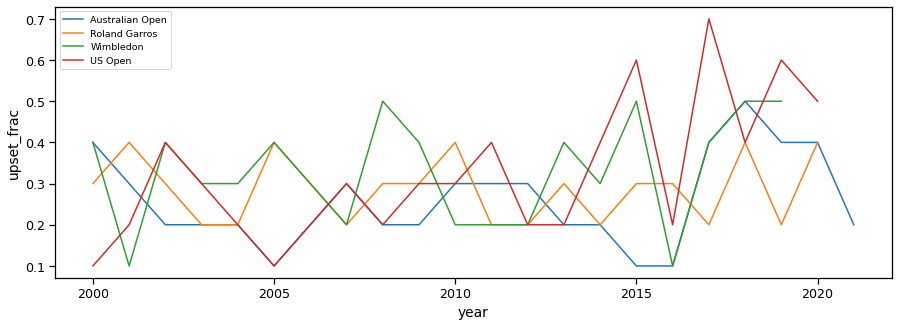

In [102]:
fig, ax = plt.subplots(figsize=(15,5))

gs_tourneys = df_matches[df_matches['tourney_level']=='G']['tourney_name'].unique()
for i, tourney in enumerate(gs_tourneys):
    df_tourney = tourney_upset_fraction(df_matches, tourney)
    df_tourney['tourney'] = tourney
    sns.lineplot(data=df_tourney, x='year', y='upset_frac', label=tourney, ax=ax)

ax.legend(fontsize='x-small')

**As can be expected by it's relatively late in the year calendar slot by which time many top players come down with fatigue or injuries from the early parts of the season, the US Open tends to be the more upset prone slam of late**

### Masters 1000's <a class="anchor" id="92-bullet"></a>

In [97]:
# make consistent the Masters 1000 tournament names across rows
df_matches.loc[df_matches['tourney_name']=='Indian Wells',['tourney_name']] = 'Indian Wells Masters'
df_matches.loc[df_matches['tourney_name']=='Rome',['tourney_name']] = 'Rome Masters'
df_matches.loc[df_matches['tourney_name']=='Cincinnati',['tourney_name']] = 'Cincinnati Masters'
df_matches.loc[df_matches['tourney_name']=='Toronto',['tourney_name']] = 'Canada Masters'

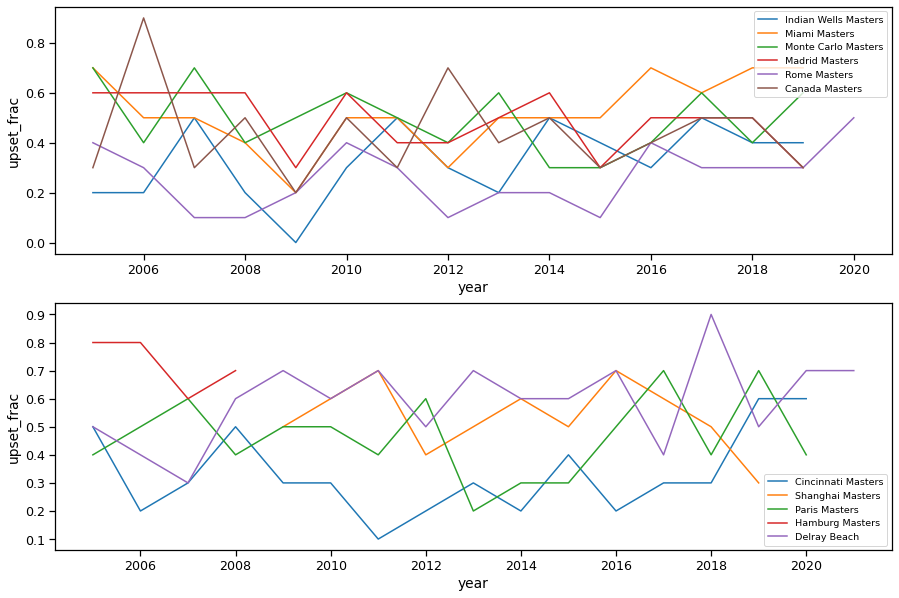

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

gs_tourneys = df_matches[df_matches['tourney_level']=='M']['tourney_name'].unique()
for i, tourney in enumerate(gs_tourneys):
    df_tourney = tourney_upset_fraction(df_matches, tourney, year_start=2005)
    df_tourney['tourney'] = tourney
    if i<=5:
        sns.lineplot(data=df_tourney, x='year', y='upset_frac', label=tourney, ax=ax[0])
    else:
        sns.lineplot(data=df_tourney, x='year', y='upset_frac', label=tourney, ax=ax[1])

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

**As has been known, Rome is the least upset prone tourney among the Clay masters, owing to its proximity to Roland Garros in the calendar and its very similar playing conditions. Rome is known to attract the top players who look to get in match-shape for RG. Madrid due to its altitude and faster playing conditions is atypical for a Clay tourney and tends to see more upsets.**

**Note that Delray Beach is not a Masters but an ATP 250 event!**

**Among the hard court masters, Cincinnati seems to be the least upset prone**

**The best player based on no. of titles won, no. of top 10 wins and best career rank is David Ferrer, by far! Thomas Enquist, Tommy Hass, Nikolay Davydenko and Thomas Berdych are other successful players not to have wn GS's.**

**Interestingly, it seems there has only ever been one non-GS winner to have been world #1, Marcelo Rios!**